In [333]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


In [334]:
data=pd.read_csv("/kaggle/input/churn-predictions-personal/Churn_Predictions.csv")

In [335]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# **EXPLORATORY DATA ANALYSIS**

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [337]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [338]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [339]:
 churn=data["Exited"].value_counts().reset_index()
churn.head()

,Exited,count
0,0,7963
1,1,2037


<Axes: xlabel='Exited', ylabel='count'>

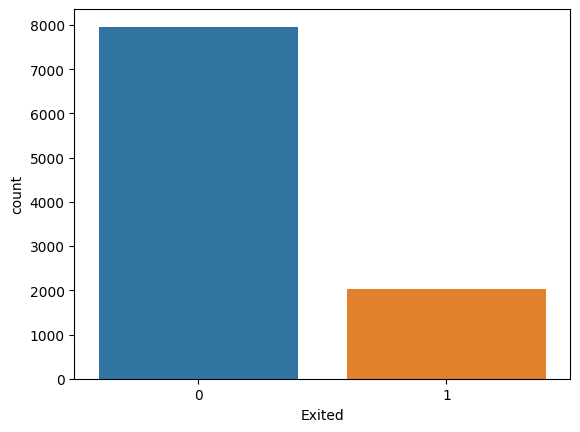

In [340]:
import seaborn as sns
sns.barplot(x=churn["Exited"], y=churn["count"])

<Axes: xlabel='Tenure', ylabel='Density'>

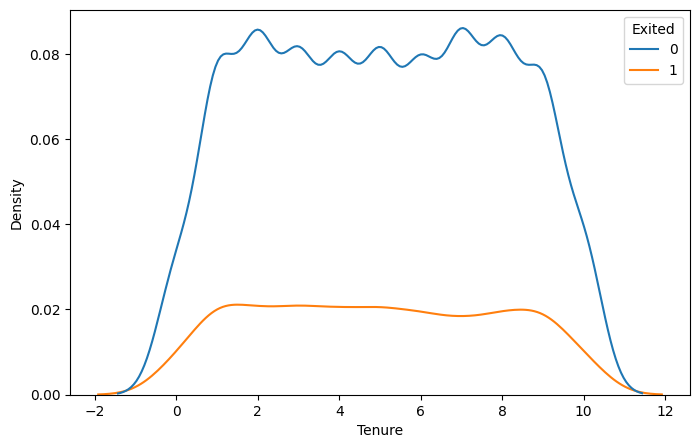

In [341]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.kdeplot(x=data["Tenure"], hue=data["Exited"])

<Axes: xlabel='Gender', ylabel='count'>

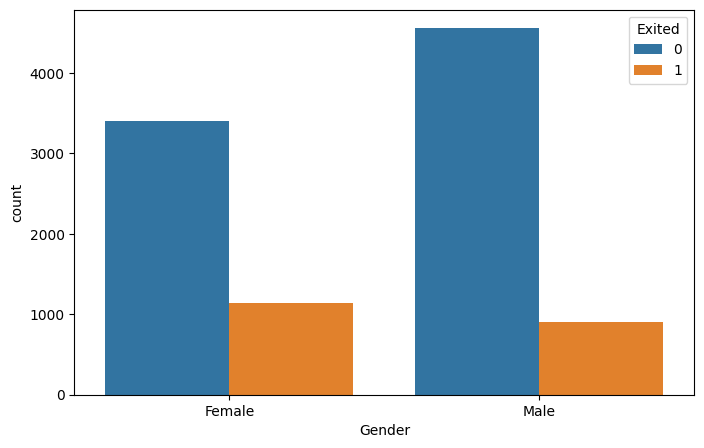

In [342]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Gender"], hue=data["Exited"])

<Axes: xlabel='Tenure', ylabel='count'>

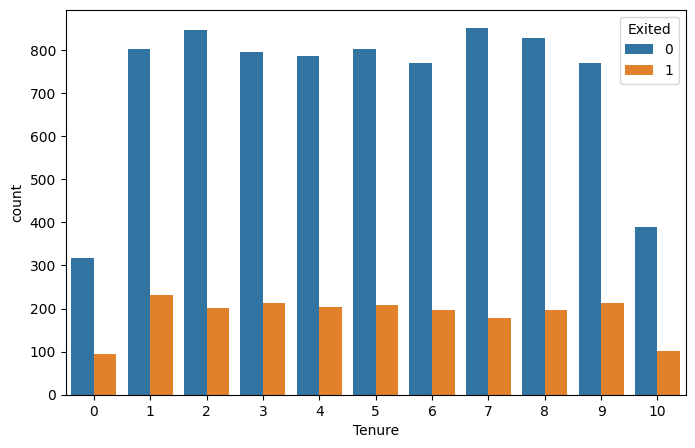

In [343]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Tenure"], hue=data["Exited"])

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

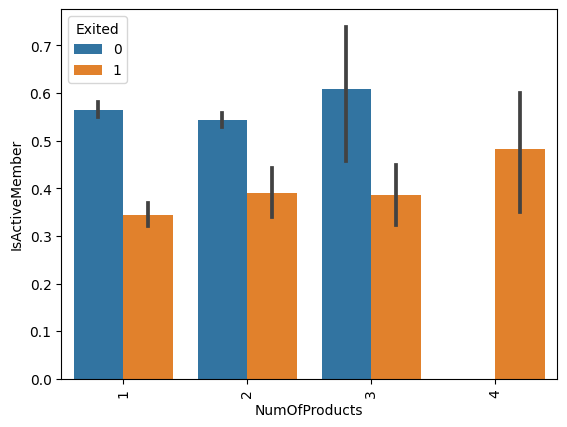

In [344]:
product= sns.barplot(x=data["NumOfProducts"], y=data["IsActiveMember"], hue=data["Exited"])
plt.xticks(rotation=90)

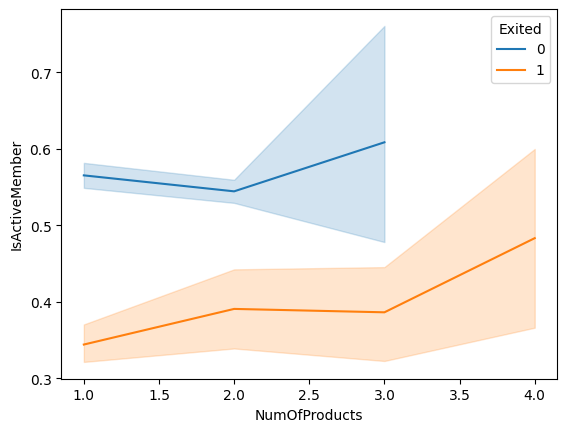

In [345]:
product= sns.lineplot(x=data["NumOfProducts"], y=data["IsActiveMember"], hue=data["Exited"])

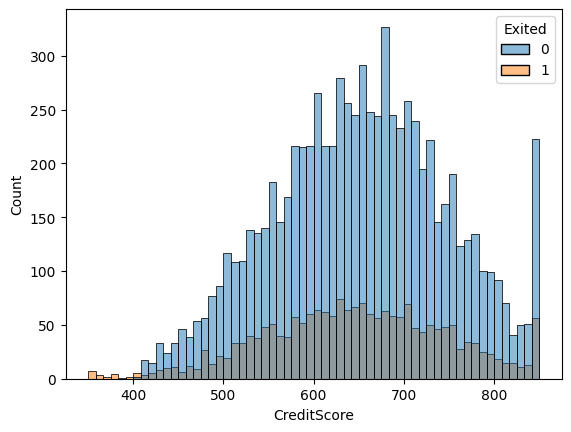

In [346]:
product= sns.histplot(x=data["CreditScore"], hue=data["Exited"], bins=60)

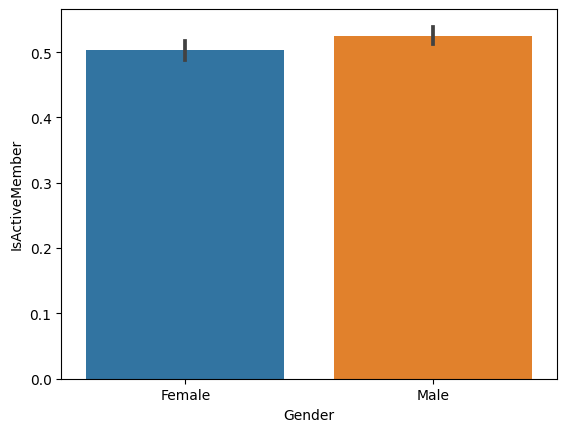

In [347]:
product= sns.barplot(x=data["Gender"], y=data["IsActiveMember"])

In [348]:
country=data["Geography"].value_counts().reset_index()
country.head()

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


<Axes: xlabel='Geography', ylabel='count'>

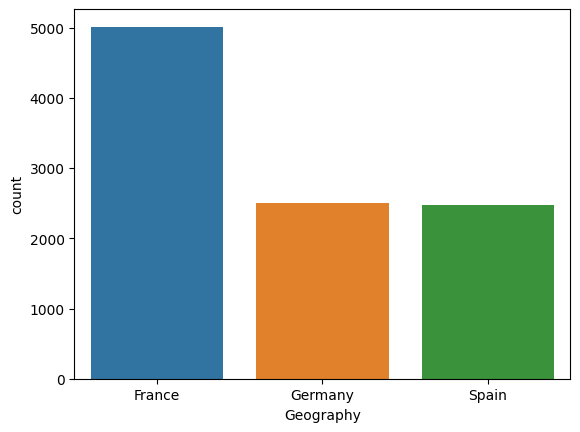

In [349]:
sns.barplot(x=country["Geography"], y=country["count"])

In [350]:
data.duplicated().sum()

0

In [351]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [352]:
data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [353]:
data.drop(columns=["RowNumber","CustomerId", "Surname"], inplace=True)

In [354]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [355]:
data= pd.get_dummies(data, columns=["Geography","Gender"],drop_first=False, dummy_na=False)

In [356]:
data=data.astype(int)

In [357]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


In [358]:
X=data.drop(columns=["Exited"])
y=data["Exited"]  

In [359]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X, y,test_size=0.2, random_state=42)

In [360]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)

X_test_scaled= scaler.transform(X_test)


In [361]:
X_train.shape

(8000, 13)

In [362]:
pip install imbalanced-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [363]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [364]:
print("Original data shape:", X.shape, y.shape)
print("Resampled data shape:", X_resampled.shape, y_resampled.shape)

# Example: Count class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Original data shape: (10000, 13) (10000,)
Resampled data shape: (12712, 13) (12712,)
Class distribution after SMOTE:
Exited
0    6356
1    6356
Name: count, dtype: int64


In [365]:
X_resampled.shape

(12712, 13)

In [366]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout

In [367]:
model= Sequential()
model.add(Dense(32, activation="relu",input_dim=13)) 
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [368]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                448       
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [369]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [370]:
model.fit(X_resampled, y_resampled, epochs=100, validation_split=0.2)

Epoch 1/100
318/318 [==============================] - 2s 3ms/step - loss: 0.5540 - accuracy: 0.7168 - val_loss: 0.6988 - val_accuracy: 0.6107
Epoch 2/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4869 - accuracy: 0.7666 - val_loss: 0.6826 - val_accuracy: 0.6276
Epoch 3/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.7921 - val_loss: 0.5744 - val_accuracy: 0.6984
Epoch 4/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8009 - val_loss: 0.5632 - val_accuracy: 0.6952
Epoch 5/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8026 - val_loss: 0.6316 - val_accuracy: 0.6516
Epoch 6/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8073 - val_loss: 0.6122 - val_accuracy: 0.6740
Epoch 7/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8091 - val_loss: 0.4808 - val_accuracy: 0.7558

In [371]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# Example: Assuming you have trained your model and made predictions
# Replace 'model' with your actual model and 'X_test' with your test data

# Example predictions (replace with actual predictions)
y_pred = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

63/63 [==============================] - 0s 1ms/step
Accuracy: 0.81
Precision: 0.51
Recall: 0.58
F1-score: 0.54
AUC-ROC: 0.82

Confusion Matrix:
[[1389  218]
 [ 167  226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1607
           1       0.51      0.58      0.54       393

    accuracy                           0.81      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.82      0.81      0.81      2000



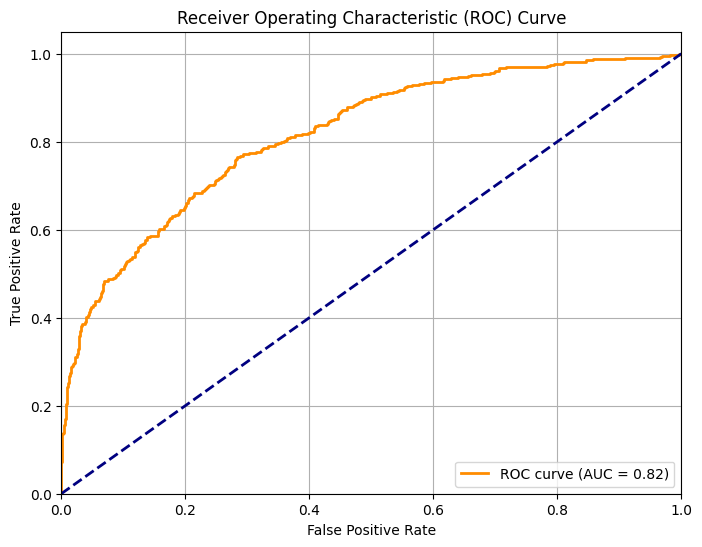

In [373]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()